# Closest Pair Of Points

Given a list of `points` of coordinates `(x, y)` find the closest pair of points that has the minimum distance between points.


### Generate Points

Generate a list of points `n` of coordinates `(x, y)` using the random module. 

In [99]:
import random
import matplotlib.pyplot as plt

# Number of points
n = 100
# Size of 2D Plan
sz = 10000
# List of points : tuple(x, y)
points = list()

for i in range(n):
    p = (random.randint(0, sz), random.randint(0, sz))
    # Avoid collision
    if p not in points:
        points.append(p)
    
print(points)

[(5092, 1313), (6953, 4206), (9555, 12), (5241, 8631), (7913, 5631), (2036, 9780), (1308, 215), (8998, 397), (3716, 8635), (4139, 6640), (495, 3282), (2335, 8016), (7734, 7704), (2100, 2441), (297, 3247), (4751, 9756), (3983, 4024), (6828, 2985), (3393, 711), (5639, 1058), (7857, 2730), (7808, 7615), (3481, 6573), (8600, 1402), (9750, 878), (8836, 329), (6801, 6596), (1766, 5380), (2374, 3546), (2320, 7786), (9264, 2316), (3840, 3229), (6770, 3855), (8015, 5632), (897, 4930), (9156, 8757), (4173, 4544), (6572, 8473), (2038, 1294), (546, 4395), (1969, 6855), (6790, 5309), (2096, 9059), (893, 6731), (7803, 5722), (9542, 1041), (7864, 415), (3995, 7142), (2851, 4511), (1699, 2346), (1150, 3911), (2080, 769), (6292, 9065), (9171, 8205), (6742, 8228), (4780, 5183), (6934, 1118), (9572, 983), (4968, 359), (8126, 8742), (9347, 8743), (2449, 4949), (3842, 3498), (6657, 6756), (2341, 3529), (4229, 5961), (7312, 1762), (5119, 6265), (2543, 3910), (1514, 940), (306, 1129), (222, 9200), (5288, 430

## Ploting The Points

Plot all the points `p` of coordinates `(x, y)` using `matplotlib`.

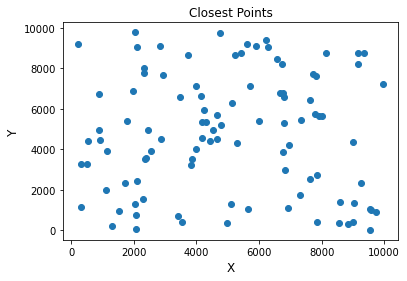

In [100]:
# Unpack points
x, y = zip(*points)

#print(x)
#print(y)

# set x-axis label and specific size
plt.xlabel('X',size=12)
# set y-axis label and specific size
plt.ylabel('Y',size=12)
# set plot title with specific size
plt.title('Closest Points',size=12)
# plt plot
plt.scatter(x, y)
plt.show()

## Brute Force Solution O(n^2)

In [101]:
import math

# Euclidian distance
def distance(p1, p2):
    d = math.sqrt(((p2[0] - p1[0])** 2) + ( (p2[1] - p1[1]) ** 2))
    return d


# Brute Force : Time O(n^2)
def closest_brute_force(points):
    min_dist = float("inf")
    p1 = None
    p2 = None

    for i in range(len(points)):
        for j in range(i+1, len(points)):
            d = distance(points[i], points[j])

            if d < min_dist:
                p1 = points[i]
                p2 = points[j]
                min_dist = d
    return p1, p2, min_dist

# Function Call
closest_points = closest_brute_force(points)

print(closest_points)

((2374, 3546), (2341, 3529), 37.12142238654117)


(2374, 3546) (2341, 3529) 37.12142238654117


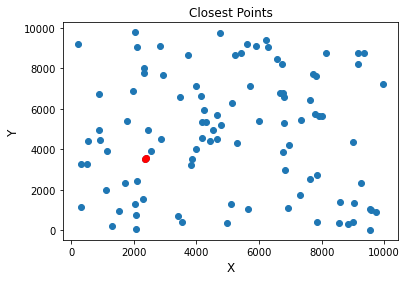

In [102]:
point_a, point_b, distance = closest_points
print(point_a, point_b, distance)
x_a, y_a = point_a
x_b, y_b = point_b

plt.xlabel('X',size=12)
plt.ylabel('Y',size=12)
plt.title('Closest Points',size=12)
plt.scatter(x, y)
plt.scatter(x_a, y_a, color="red")
plt.scatter(x_b, y_b, color="red")
plt.show()

## Divide And Conquer Solution 

In [103]:
# Euclidian distance
def distance(p1, p2):
    d = math.sqrt(((p2[0] - p1[0])** 2) + ( (p2[1] - p1[1]) ** 2))
    return d


# Brute Force : Time O(n^2)
def closest_brute_force(points):
    min_dist = float("inf")
    p1 = None
    p2 = None

    for i in range(len(points)):
        for j in range(i+1, len(points)):
            d = distance(points[i], points[j])

            if d < min_dist:
                p1 = points[i]
                p2 = points[j]
                min_dist = d
    return p1, p2, min_dist


def recursive_closest(xsorted, ysorted):
    n = len(xsorted)
    if n <= 3:
        return closest_brute_force(xsorted)
    else:
        midpoint = xsorted[n//2]
        xsorted_left = xsorted[:n//2]
        xsorted_right = xsorted[n//2:]
        ysorted_left = []
        ysorted_right = []
        for point in ysorted:
            ysorted_left.append(point) if (point[0] <= midpoint[0]) else ysorted_right.append(point)
        (p1_left, p2_left, delta_left) = recursive_closest(xsorted_left, ysorted_left)
        (p1_right, p2_right, delta_right) = recursive_closest(xsorted_right, ysorted_right)
        (p1, p2, delta) = (p1_left, p2_left, delta_left) if (delta_left < delta_right) else (p1_right, p2_right, delta_right)
        in_band = [point for point in ysorted if midpoint[0]-delta < point[0] < midpoint[0]+delta]
        for i in range(len(in_band)):
            for j in range(i+1, min(i+7, len(in_band))):
                d = dist(in_band[i], in_band[j])
                if d < delta:
                    print(in_band[i], in_band[j])
                    (p1, p2, delta) = (in_band[i], in_band[j], d)
        return p1, p2, delta


def closest(points):
    xsorted = sorted(points, key=lambda point: point[0])
    ysorted = sorted(points, key=lambda point: point[1])
    return recursive_closest(xsorted, ysorted)

# Function Call
closest_points = closest(points)

print(closest_points)

(297, 3247) (495, 3282)
(2070, 54) (2080, 769)
(2080, 769) (2038, 1294)
(2341, 3529) (2374, 3546)
(4305, 5349) (4164, 5368)
(4447, 4401) (4656, 4489)
(6292, 9065) (5901, 9082)
(6292, 9065) (6225, 9406)
(6657, 6756) (6779, 6757)
(7312, 1762) (7615, 2546)
(6934, 1118) (7312, 1762)
(7803, 5722) (7642, 6415)
(7808, 7615) (7734, 7704)
(9750, 878) (9572, 983)
(9572, 983) (9542, 1041)
((2341, 3529), (2374, 3546), 37.12142238654117)


(2341, 3529) (2374, 3546) 37.12142238654117


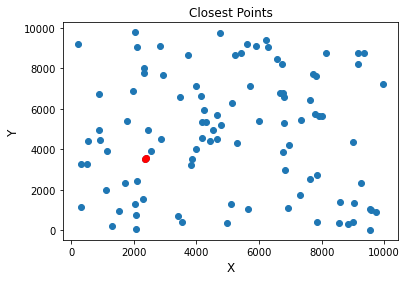

In [104]:
point_a, point_b, distance = closest_points
print(point_a, point_b, distance)
x_a, y_a = point_a
x_b, y_b = point_b

plt.xlabel('X',size=12)
plt.ylabel('Y',size=12)
plt.title('Closest Points',size=12)
plt.scatter(x, y)
plt.scatter(x_a, y_a, color="red")
plt.scatter(x_b, y_b, color="red")
plt.show()